## Cough Detection Model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
c5_t=pd.read_excel("/Users/yashnaik12/Downloads/Cough_Task-1/Cough_sample_data.xlsx",sheet_name="5C_T")
c7_t=pd.read_excel("/Users/yashnaik12/Downloads/Cough_Task-1/Cough_sample_data.xlsx",sheet_name="7C_T")
c7_t2=pd.read_excel("/Users/yashnaik12/Downloads/Cough_Task-1/Cough_sample_data.xlsx",sheet_name="7C_T2")
c9=pd.read_excel("/Users/yashnaik12/Downloads/Cough_Task-1/Cough_sample_data.xlsx",sheet_name="9c")
c12=pd.read_excel("/Users/yashnaik12/Downloads/Cough_Task-1/Cough_sample_data.xlsx",sheet_name="12c")
c16=pd.read_excel("/Users/yashnaik12/Downloads/Cough_Task-1/Cough_sample_data.xlsx",sheet_name="16c")
cn_t=pd.read_excel("/Users/yashnaik12/Downloads/Cough_Task-1/Cough_sample_data.xlsx",sheet_name="N_T")

In [3]:
c5_t["ts"]=range(len(c5_t)) #calculating length of the data points
c7_t["ts"]=range(len(c7_t))
c7_t2["ts"]=range(len(c7_t2))
c9["ts"]=range(len(c9))
c12["ts"]=range(len(c12))
c16["ts"]=range(len(c16))
cn_t["ts"]=range(len(cn_t))



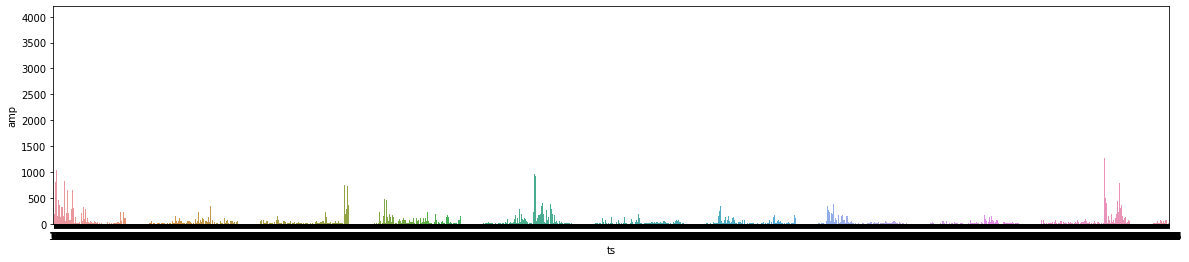

In [4]:
plt.figure(figsize=(20,4)) #visualising all the datasets #observing frequency 
sns.barplot(x="ts",y="amp",data=c5_t)
plt.show()

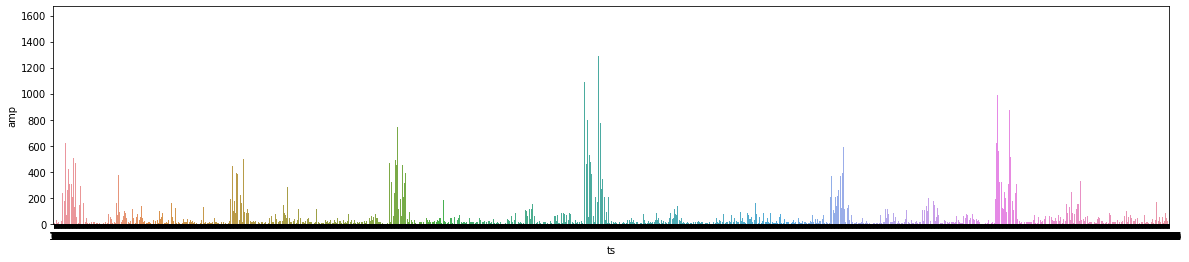

In [5]:
plt.figure(figsize=(20,4))
sns.barplot(x="ts",y="amp",data=c7_t)
plt.show()

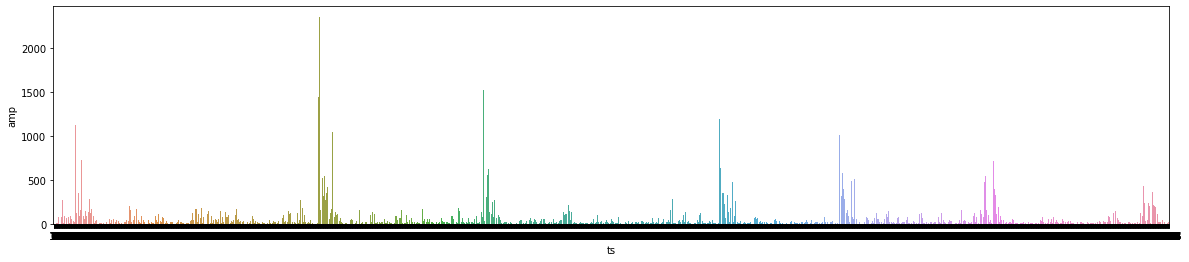

In [6]:
plt.figure(figsize=(20,4))
sns.barplot(x="ts",y="amp",data=c7_t2)
plt.show()

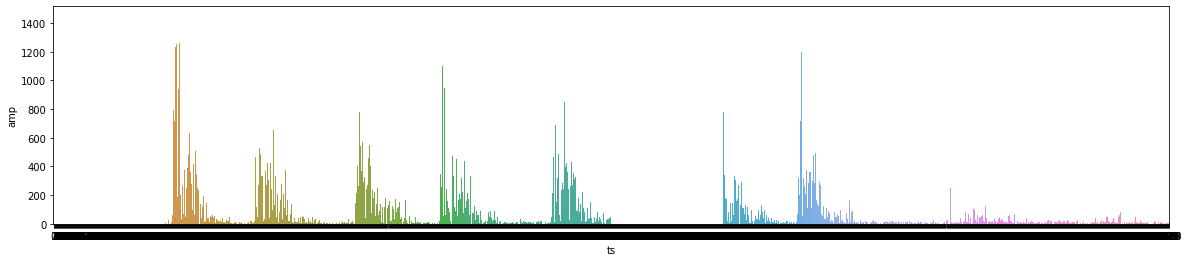

In [7]:
plt.figure(figsize=(20,4))
sns.barplot(x="ts",y="amp",data=c9)
plt.show()

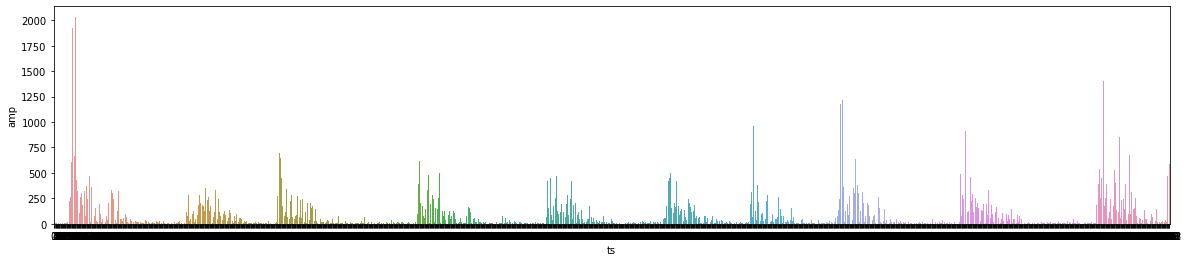

In [8]:
plt.figure(figsize=(20,4))
sns.barplot(x="ts",y="amp",data=c12)
plt.show()

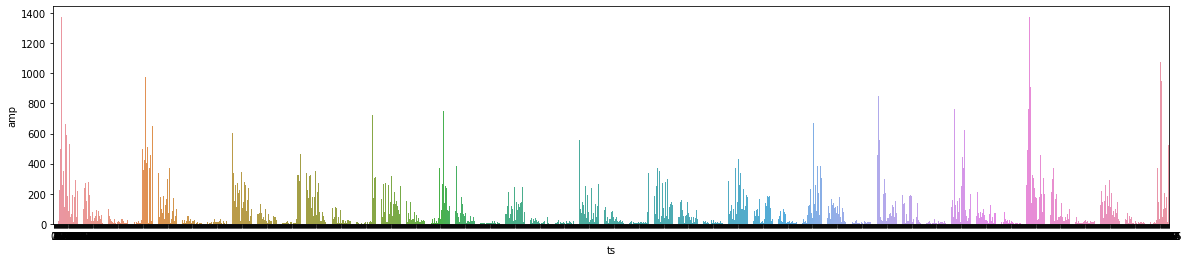

In [9]:
plt.figure(figsize=(20,4))
sns.barplot(x="ts",y="amp",data=c16)
plt.show()

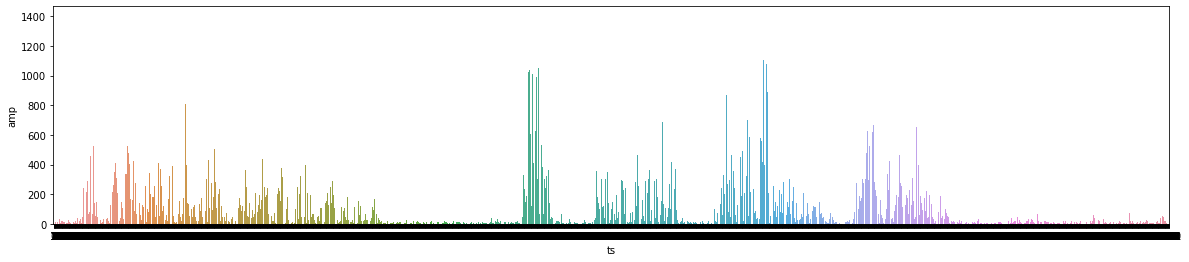

In [10]:
plt.figure(figsize=(20,4))
sns.barplot(x="ts",y="amp",data=cn_t)
plt.show()

In [11]:
c9=c9.drop(columns="Unnamed: 2",axis=1) #dropping unnecessary column
c12=c12.drop(columns="Unnamed: 2",axis=1)
c16=c16.drop(columns="Unnamed: 2",axis=1) 
cn_t=cn_t.drop(columns="Unnamed: 2",axis=1) 



In [12]:
c9=c9.rename(columns={"Unnamed: 1":"Labels"}) #c9,c12,c16 datasets have only cough aplitude so labelling them as 1
c9["Labels"]=c9["Labels"].replace(np.nan,1).astype(int) #replacing all NaN values with 1 (having cough)
c12=c12.rename(columns={"Unnamed: 1":"Labels"})
c12["Labels"]=c12["Labels"].replace(np.nan,1).astype(int)
c16=c16.rename(columns={"Unnamed: 1":"Labels"})
c16["Labels"]=c16["Labels"].replace(np.nan,1).astype(int)



In [13]:
cn_t=cn_t.rename(columns={"Unnamed: 1":"Labels"}) #cn_t dataset has only talking aplitude so labelling them as 0
cn_t["Labels"]=cn_t["Labels"].replace(np.nan,0).astype(int) #replacing all NaN values with 0 (not having cough)

### Data have lot of noise so using moving mean to remove noise

In [14]:
c5_t["amp"]=c5_t["amp"].rolling(90).mean()  #removing noise from all the datasets
c7_t["amp"]=c7_t["amp"].rolling(90).mean()
c7_t2["amp"]=c7_t2["amp"].rolling(90).mean()
c9["amp"]=c9["amp"].rolling(90).mean()
c12["amp"]=c12["amp"].rolling(90).mean()a
c16["amp"]=c16["amp"].rolling(90).mean()
cn_t["amp"]=cn_t["amp"].rolling(90).mean()

In [87]:
c16["amp"].describe()

count    2098.000000
mean       89.232422
std        38.083390
min        12.433333
25%        59.711111
50%        89.155556
75%       113.855556
max       209.888889
Name: amp, dtype: float64

In [88]:
c16.dropna(inplace=True)

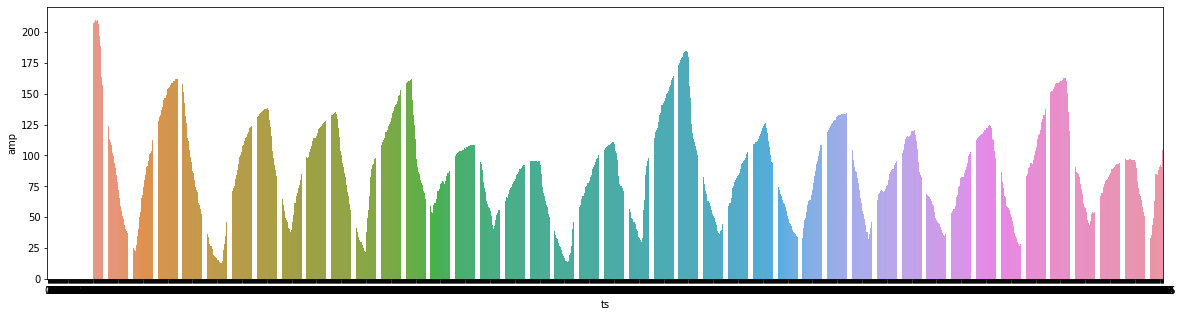

In [20]:
plt.figure(figsize=(20,5))
sns.barplot(x="ts",y="amp",data=c16)
plt.show()

### We can excatly count 16 coughs and in data set even we have detected 16 coughs

In [89]:
c12.describe()

,amp,Labels,ts
count,1925.000000,2014.0,2014.000000
mean,80.490713,1.0,1006.500000
std,60.998109,0.0,581.536041
min,7.377778,1.0,0.000000
25%,26.600000,1.0,503.250000
50%,71.233333,1.0,1006.500000
75%,118.122222,1.0,1509.750000
max,280.122222,1.0,2013.000000


In [90]:
c12.dropna(inplace=True)

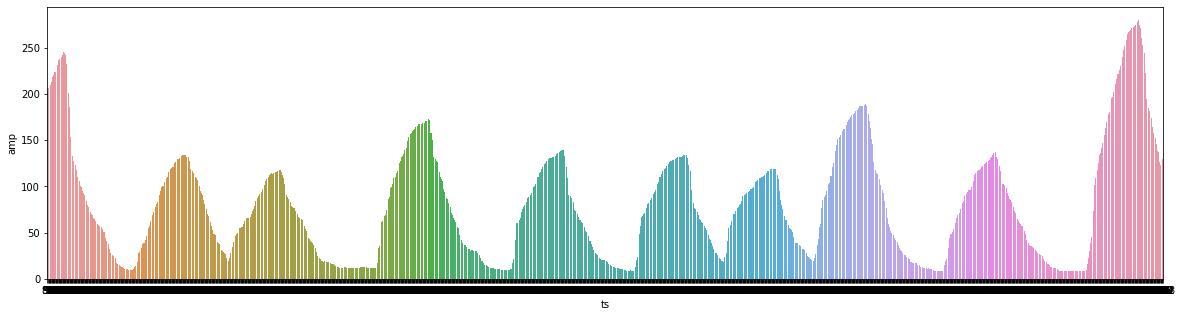

In [91]:
plt.figure(figsize=(20,5))
sns.barplot(x="ts",y="amp",data=c12)
plt.show()

In [92]:
c9.describe()

,amp,Labels,ts
count,2141.000000,2230.0,2230.000000
mean,83.121906,1.0,1114.500000
std,68.446513,0.0,643.889872
min,7.033333,1.0,0.000000
25%,19.366667,1.0,557.250000
50%,61.977778,1.0,1114.500000
75%,141.722222,1.0,1671.750000
max,247.488889,1.0,2229.000000


In [93]:
c9.dropna(inplace=True)

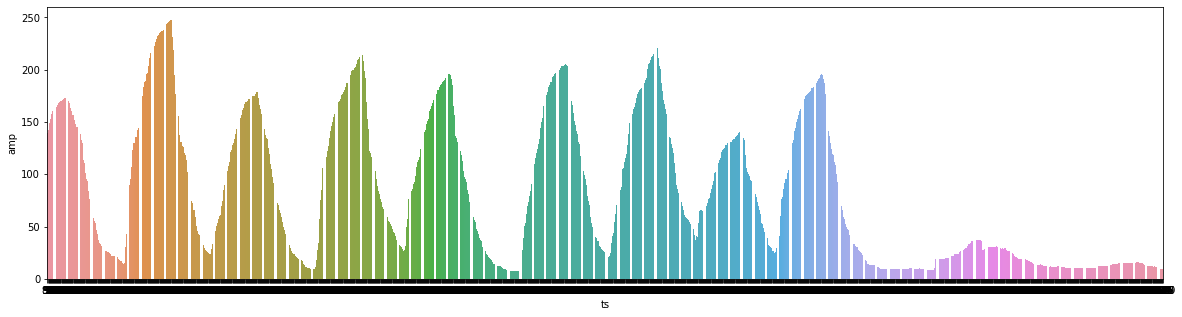

In [94]:
plt.figure(figsize=(20,5))
sns.barplot(x="ts",y="amp",data=c9)
plt.show()

In [95]:
cn_t.describe()

,amp,Labels,ts
count,4544.000000,4633.0,4633.000000
mean,96.467310,0.0,2316.000000
std,90.976526,0.0,1337.576228
min,5.877778,0.0,0.000000
25%,12.513889,0.0,1158.000000
50%,89.122222,0.0,2316.000000
75%,141.844444,0.0,3474.000000
max,449.766667,0.0,4632.000000


In [96]:
cn_t.dropna(inplace=True)

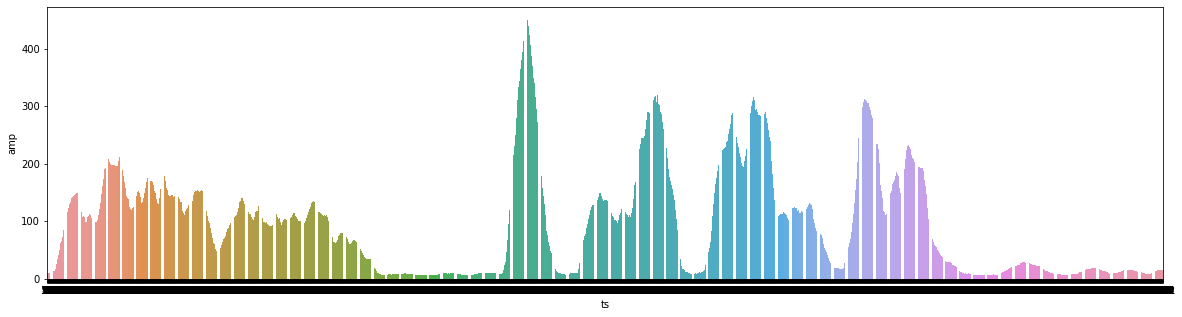

In [97]:
plt.figure(figsize=(20,5))
sns.barplot(x="ts",y="amp",data=cn_t)
plt.show()

### Concating noise free datasets which have only cough and only talking amplitudes

In [99]:
df=pd.concat([c9,c12,c16,cn_t],axis=0) #concating noise free datasets which have only cough and only talking amplitudes
df["ts"]=range(len(df))

In [100]:
df["Labels"].value_counts() 

1    6164
0    4544
Name: Labels, dtype: int64

In [102]:
df.dropna(inplace=True) #removing NaN

In [103]:
X=df[["amp"]] #seperating target column
Y=df["Labels"]



In [104]:
from sklearn.model_selection import train_test_split #splitting data into test and train
X_train ,X_test, Y_train , Y_test = train_test_split(X , Y , test_size = 0.30 , random_state =42)
X_train.shape , Y_train.shape

((7495, 1), (7495,))

In [105]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

In [106]:
LR=LogisticRegression()
NB=GaussianNB()
KNN_final=KNeighborsClassifier(n_neighbors=17,weights='uniform')
DT=DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=25)
RF=RandomForestClassifier(n_estimators=10,random_state=0)
#bagging
KNN_bag=BaggingClassifier(base_estimator=KNN_final,n_estimators=10,random_state=0)
LR_bag=BaggingClassifier(base_estimator=LR,n_estimators=10,random_state=0)
NB_bag=BaggingClassifier(base_estimator=NB,n_estimators=10,random_state=0)
DT_bag=BaggingClassifier(n_estimators=10,random_state=0)
#boosting models
LR_boost=AdaBoostClassifier(base_estimator=LR,n_estimators=100,random_state=0)
DT_boost=AdaBoostClassifier(base_estimator=DT,n_estimators=50,random_state=0)
RF_boost=AdaBoostClassifier(base_estimator=RF,n_estimators=50,random_state=0)
NB_boost=AdaBoostClassifier(base_estimator=NB,n_estimators=50,random_state=0)

In [107]:
models=[]
models.append(("Logistic",LR))
models.append(("NaiveBayes",NB))
models.append(("KNN_wv",KNN_final))
models.append(("DT",DT))
models.append(('RF',RF))
models.append(('BaggedkNN',KNN_bag))
models.append(('BaggedLR',LR_bag))
models.append(("BaggedNB",NB_bag))
models.append(("BaggedDT",DT_bag))
models.append(("BoostLR",LR_boost))
models.append(("BoostDT",DT_boost))
models.append(("BoostRF",RF_boost))
models.append(("BoostNB",NB_boost))

In [108]:
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(shuffle = True, n_splits = 5, random_state = 0)
    cv_results = model_selection.cross_val_score(model,X,Y,cv = kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print('NAME: {} ----- MEAN: {} ----- VAR: {} '.format(name,np.mean(cv_results),np.var(cv_results,ddof=1)))

NAME: Logistic ----- MEAN: 0.4863554149078301 ----- VAR: 0.0001330244281382856 
NAME: NaiveBayes ----- MEAN: 0.6686524554118491 ----- VAR: 1.537439740167372e-05 
NAME: KNN_wv ----- MEAN: 0.712233684277167 ----- VAR: 3.4827454198995164e-05 
NAME: DT ----- MEAN: 0.6349576872582218 ----- VAR: 1.914514106746974e-05 
NAME: RF ----- MEAN: 0.66289422086599 ----- VAR: 3.584429027387259e-05 
NAME: BaggedkNN ----- MEAN: 0.715993856883497 ----- VAR: 4.2891640720822216e-05 
NAME: BaggedLR ----- MEAN: 0.4863554149078301 ----- VAR: 0.0001330244281382856 
NAME: BaggedNB ----- MEAN: 0.6685367668873811 ----- VAR: 1.5474249401140688e-05 
NAME: BaggedDT ----- MEAN: 0.66289422086599 ----- VAR: 3.584429027387259e-05 
NAME: BoostLR ----- MEAN: 0.4863554149078301 ----- VAR: 0.0001330244281382856 
NAME: BoostDT ----- MEAN: 0.6464670501985192 ----- VAR: 2.227366554559652e-05 
NAME: BoostRF ----- MEAN: 0.652579987046583 ----- VAR: 3.986498938749116e-05 
NAME: BoostNB ----- MEAN: 0.6397671579920198 ----- VAR: 2.

Logistic
Here is our mean accuracy on the test set:
 0.617
Here is our mean accuracy on the train set:
 0.608


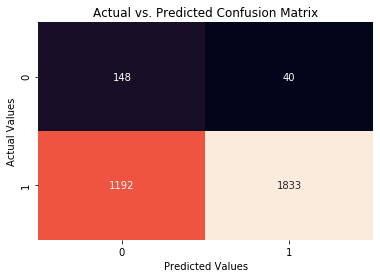


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.79      0.11      0.19      1340
           1       0.61      0.98      0.75      1873

    accuracy                           0.62      3213
   macro avg       0.70      0.54      0.47      3213
weighted avg       0.68      0.62      0.52      3213

--------------------------------------------------------

NaiveBayes
Here is our mean accuracy on the test set:
 0.598
Here is our mean accuracy on the train set:
 0.600


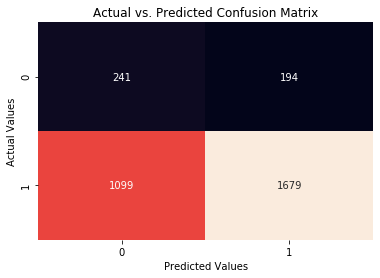


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.55      0.18      0.27      1340
           1       0.60      0.90      0.72      1873

    accuracy                           0.60      3213
   macro avg       0.58      0.54      0.50      3213
weighted avg       0.58      0.60      0.53      3213

--------------------------------------------------------

KNN_wv
Here is our mean accuracy on the test set:
 0.667
Here is our mean accuracy on the train set:
 0.718


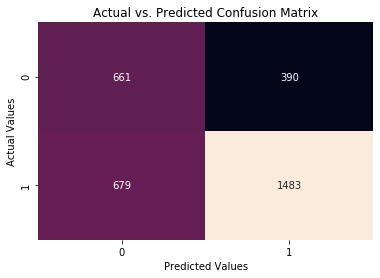


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.63      0.49      0.55      1340
           1       0.69      0.79      0.74      1873

    accuracy                           0.67      3213
   macro avg       0.66      0.64      0.64      3213
weighted avg       0.66      0.67      0.66      3213

--------------------------------------------------------

DT
Here is our mean accuracy on the test set:
 0.623
Here is our mean accuracy on the train set:
 0.838


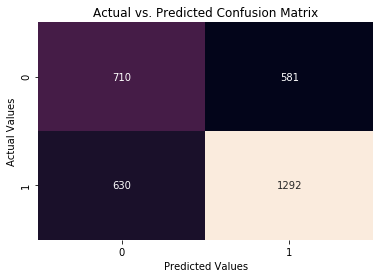


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.55      0.53      0.54      1340
           1       0.67      0.69      0.68      1873

    accuracy                           0.62      3213
   macro avg       0.61      0.61      0.61      3213
weighted avg       0.62      0.62      0.62      3213

--------------------------------------------------------

RF
Here is our mean accuracy on the test set:
 0.614
Here is our mean accuracy on the train set:
 0.899


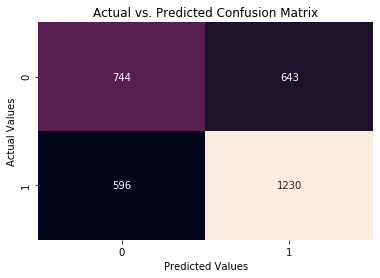


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.54      0.56      0.55      1340
           1       0.67      0.66      0.67      1873

    accuracy                           0.61      3213
   macro avg       0.61      0.61      0.61      3213
weighted avg       0.62      0.61      0.62      3213

--------------------------------------------------------

BaggedkNN
Here is our mean accuracy on the test set:
 0.674
Here is our mean accuracy on the train set:
 0.715


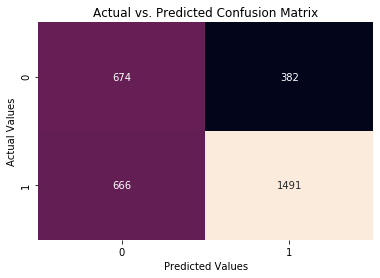


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.64      0.50      0.56      1340
           1       0.69      0.80      0.74      1873

    accuracy                           0.67      3213
   macro avg       0.66      0.65      0.65      3213
weighted avg       0.67      0.67      0.67      3213

--------------------------------------------------------

BaggedLR
Here is our mean accuracy on the test set:
 0.616
Here is our mean accuracy on the train set:
 0.609


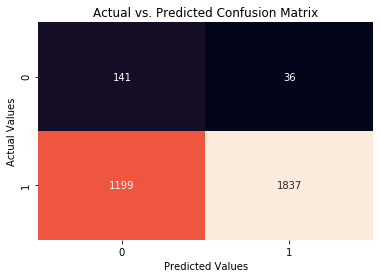


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.80      0.11      0.19      1340
           1       0.61      0.98      0.75      1873

    accuracy                           0.62      3213
   macro avg       0.70      0.54      0.47      3213
weighted avg       0.68      0.62      0.51      3213

--------------------------------------------------------

BaggedNB
Here is our mean accuracy on the test set:
 0.598
Here is our mean accuracy on the train set:
 0.601


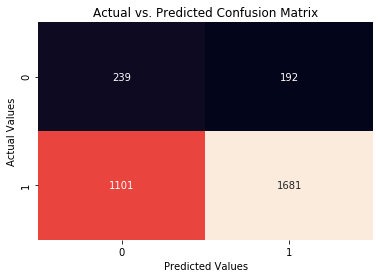


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.55      0.18      0.27      1340
           1       0.60      0.90      0.72      1873

    accuracy                           0.60      3213
   macro avg       0.58      0.54      0.50      3213
weighted avg       0.58      0.60      0.53      3213

--------------------------------------------------------

BaggedDT
Here is our mean accuracy on the test set:
 0.614
Here is our mean accuracy on the train set:
 0.899


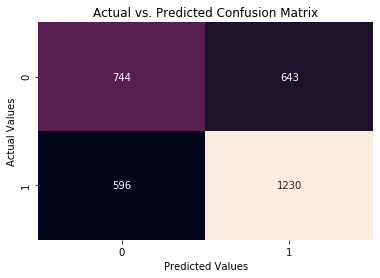


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.54      0.56      0.55      1340
           1       0.67      0.66      0.67      1873

    accuracy                           0.61      3213
   macro avg       0.61      0.61      0.61      3213
weighted avg       0.62      0.61      0.62      3213

--------------------------------------------------------

BoostLR
Here is our mean accuracy on the test set:
 0.617
Here is our mean accuracy on the train set:
 0.609


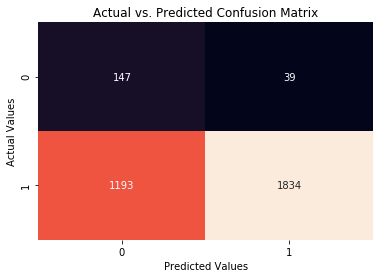


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.79      0.11      0.19      1340
           1       0.61      0.98      0.75      1873

    accuracy                           0.62      3213
   macro avg       0.70      0.54      0.47      3213
weighted avg       0.68      0.62      0.52      3213

--------------------------------------------------------

BoostDT
Here is our mean accuracy on the test set:
 0.624
Here is our mean accuracy on the train set:
 0.921


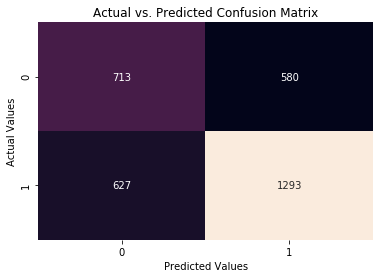


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.55      0.53      0.54      1340
           1       0.67      0.69      0.68      1873

    accuracy                           0.62      3213
   macro avg       0.61      0.61      0.61      3213
weighted avg       0.62      0.62      0.62      3213

--------------------------------------------------------

BoostRF
Here is our mean accuracy on the test set:
 0.613
Here is our mean accuracy on the train set:
 0.920


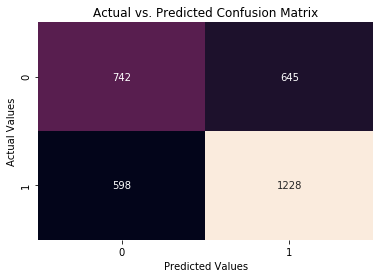


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.53      0.55      0.54      1340
           1       0.67      0.66      0.66      1873

    accuracy                           0.61      3213
   macro avg       0.60      0.60      0.60      3213
weighted avg       0.62      0.61      0.61      3213

--------------------------------------------------------

BoostNB
Here is our mean accuracy on the test set:
 0.662
Here is our mean accuracy on the train set:
 0.668


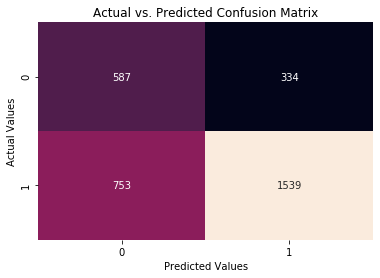


CLASSIFICATION REPORT               precision    recall  f1-score   support

           0       0.64      0.44      0.52      1340
           1       0.67      0.82      0.74      1873

    accuracy                           0.66      3213
   macro avg       0.65      0.63      0.63      3213
weighted avg       0.66      0.66      0.65      3213

--------------------------------------------------------



In [109]:
for name,model in models:
  print(name)
  model.fit(X_train,Y_train)
  y_predict_LR=model.predict(X_test)
  accuracy_test =model.score(X_test,Y_test)

  print("Here is our mean accuracy on the test set:\n {0:.3f}"\
        .format(accuracy_test))
  accuracy_train =model.score(X_train,Y_train)

  print("Here is our mean accuracy on the train set:\n {0:.3f}"\
        .format(accuracy_train))
  confusion = metrics.confusion_matrix( y_predict_LR, Y_test )
  sns.heatmap(confusion, annot=True, fmt='d', cbar=False)
  plt.xlabel('Predicted Values')
  plt.ylabel('Actual Values')
  plt.title('Actual vs. Predicted Confusion Matrix')
  plt.show()
  print()
  print('CLASSIFICATION REPORT',classification_report(Y_test, y_predict_LR))
  print('--------------------------------------------------------')
  print()

### Best model for this data set is KNN.

In [110]:
KNN_bag=BaggingClassifier(base_estimator=KNN_final,n_estimators=10,random_state=0)

In [111]:
KNN_bag.fit(X,Y)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=17),
                  random_state=0)

### Predicting Labels in the dataset which has both coughing and talking amplitude

In [118]:
c7_t2.describe()

,amp,Unnamed: 1,ts
count,5940.000000,0.0,6029.000000
mean,58.951266,NaN,3014.000000
std,68.755534,NaN,1740.566718
min,8.888889,NaN,0.000000
25%,22.352778,NaN,1507.000000
50%,32.044444,NaN,3014.000000
75%,52.694444,NaN,4521.000000
max,432.455556,NaN,6028.000000


In [123]:
c7_t2=c7_t2.drop(columns="Unnamed: 2",axis=1) # droping the unnamed :2 column
c7_t2=c7_t2.drop(columns="Unnamed: 1",axis=1) # droping the unnamed :1 column


In [125]:
c7_t2.dropna(inplace=True)

In [126]:
c7_t2.head()

,amp,ts
89,50.544444,89
90,51.344444,90
91,51.855556,91
92,52.600000,92
93,53.211111,93


In [127]:
z=c7_t2[["amp"]]

In [128]:
y_predict_KNN_bag=model.predict(z)

In [129]:
c7_t2["Labels"]=y_predict_KNN_bag

In [130]:
c7_t2.head()

,amp,ts,Labels
89,50.544444,89,1
90,51.344444,90,1
91,51.855556,91,1
92,52.600000,92,1
93,53.211111,93,1


In [131]:
c7_t2["Labels"].value_counts()

1    4992
0     948
Name: Labels, dtype: int64

In [132]:
c7_t2_cough=c7_t2[c7_t2["Labels"]==1] # only considering the data amp which are cough talking data is sperated by trained model

In [133]:
c7_t2_cough["ts"]=range(len(c7_t2_cough))

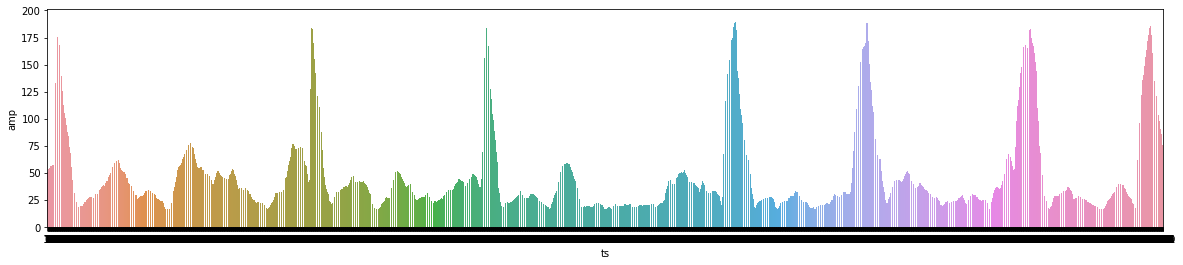

In [134]:
plt.figure(figsize=(20,4))
sns.barplot(x="ts",y="amp",data=c7_t2_cough)
plt.show()

## We can observe that number of peaks are seven so total number of cough=7